In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.03829103]


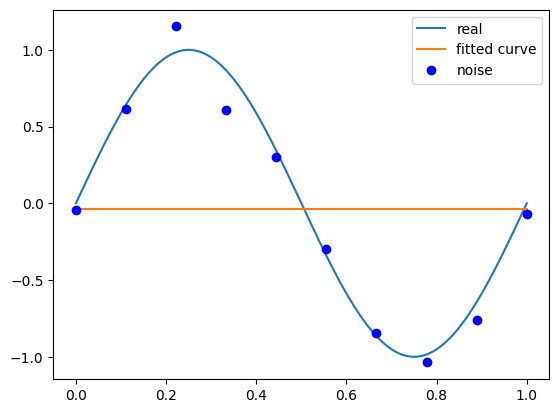

In [4]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.40716418  0.66529106]


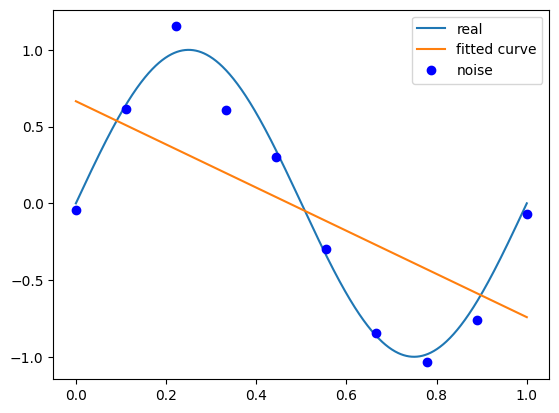

In [5]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 20.7941468  -31.30821229  10.54452133  -0.07085111]


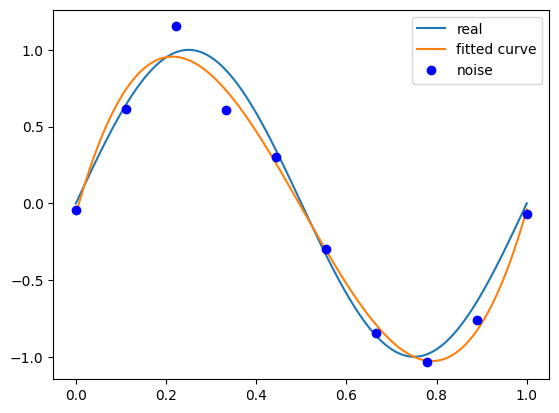

In [6]:
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-2.19833702e+04  1.04212129e+05 -2.08942810e+05  2.30209697e+05
 -1.51403768e+05  6.03069147e+04 -1.40071763e+04  1.67927212e+03
 -7.09174683e+01 -4.23732937e-02]


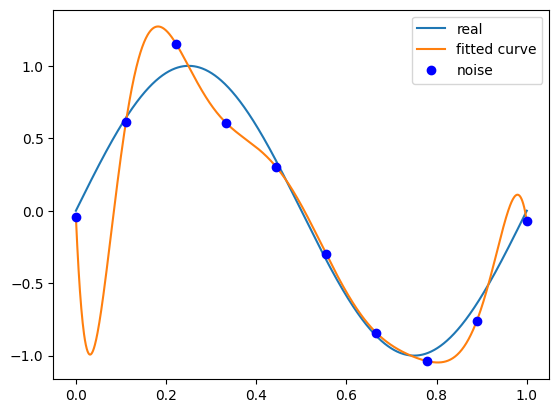

In [7]:
p_lsq_9 = fitting(M=9)

In [8]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [9]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

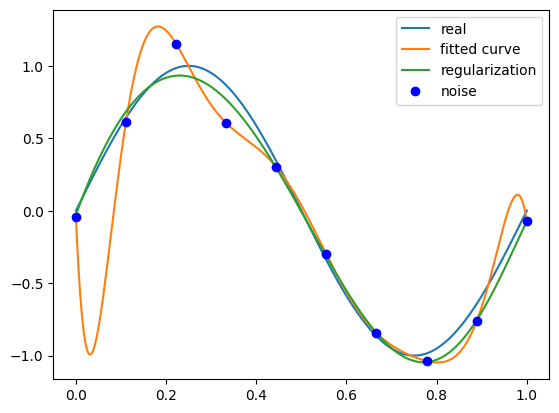

In [10]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()